In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<h1> Sentiment and Emotional Analysis of Indian Union Budget 2022-23 on Social Media</h1>

<h4>Submitted By Group-24
<ul><li>Aditya Dixit(MT21004)</li>
<li>Mohnish Basarkar(MT21052)</li>
<li>Shivang Kanwar(MT21084)</li>
<li>Shubham Aggarwal(MT21090)</li></ul></h4>

In [ ]:
#library to support conversion of multiple languages to english language
pip install googletrans==3.1.0a0

In [ ]:
#importing header files 
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import googletrans
from googletrans import Translator, constants
from pprint import pprint
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import pickle
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,auc,f1_score,precision_score,recall_score
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from wordcloud import WordCloud
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_curve,auc,f1_score,precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import SGDClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


<h2> Pre-Processing of Data </h2>

In [ ]:
######################## PREPROCCESSING TWEETS TO CLEAN THEM ###################
def preprocessing(t):
    #Replacing @username of users with empty string
    t = re.sub('@[^\s]+','',t)  
    #Removing repeating words like shivanggggggggg from tweets
    repeat_word = re.compile(r"(.)\1{1,}", re.IGNORECASE)
    t = repeat_word.sub(r"\1\1", t)
    #Replacing hashtag #word with only word
    t = re.sub(r'#([^\s]+)', r'\1', t)
    #Replacing all urls of the form www.* or https?://* with empty string
    t = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',t)
    #trimming tweet
    t = t.strip('\'"')
    #Both postive and negative emoticons is stored in emoticons list
    emoticons = \
    [
     ('__positive__',[ ':-)', ':)', '(:', '(-:', \
                       ':-D', ':D', 'X-D', 'XD', 'xD', \
                       '<3', ':\*', ';-)', ';)', ';-D', ';D', '(;', '(-;', ] ),\
     ('__negative__', [':-(', ':(', '(:', '(-:', ':,(',\
                       ':\'(', ':"(', ':((', ] ),\
    ]

    def joining(a):
        return '(' + '|'.join( a ) + ')'

    def change_parentheses(a):            #changing parenthesis
        return [i.replace(')', '[)}\]]').replace('(', '[({\[]') for i in a]

    emoticons_rgex = [ (i, re.compile(joining(change_parentheses(j))) ) \
            for (i, j) in emoticons ]
    
    for (i, j) in emoticons_rgex :
        t = re.sub(j, ' '+i+' ', t)
    #converting tweet to lowercase
    t = t.lower()
    return t

#stemming of tweets
def stemm(t):
        stemmer = nltk.stem.PorterStemmer()    
        stem_tweet = ''
        words = [word if(word[0:2]=='__') else word.lower() \
                    for word in t.split() \
                    if len(word) >= 3]
        words = [stemmer.stem(w) for w in words] 
        stem_tweet = ' '.join(words)
        return stem_tweet

# main function which calls preprocessing function
def mainprocess(A):
        A = [stemm(preprocessing(t)) for t in A]
        return A

<h2> Process Hindi tweets and comments </h2>



Hindi tweets and comments 2021

In [ ]:
#reading csv containing hindi tweets for year 2021
hindi_2021_df = pd.read_csv('/content/drive/My Drive/IR_project/hindi_2021.csv', encoding = "utf-8", header=None)
hindi_2021_df.head()

,0
0,अगर 100 like आया तो मैं समझ जाऊँगा कि मेरे द्व...
1,अगर 100 like आया तो मैं समझ जाऊँगा कि मेरे द्व...
2,अगर किसी को पेट्रोल डालना है तो सिर्फ 20 रुपये...
3,अगर किसी को पेट्रोल डालना है तो सिर्फ 20 रुपये...
4,अगर ख्वाईश कुछ अलग करने की है तो दिल और दिमाग ...


Hindi tweets and comments 2022

In [ ]:
#reading csv containing hindi tweets for year 2021
hindi_2022_df = pd.read_csv('/content/drive/My Drive/IR_project/hindi_2022.csv', encoding = "utf-8", header=None)
hindi_2022_df.head()

,0
0,अखबार तो पूरा पढ़ा था पर ये सब निर्मला सीतारमण...
1,अगर जीवन में सफलता प्राप्त करनी है तो<br> मेह...
2,अगर आप खुद ही खुद पर भरोशा नहीं करोगे तो कोई औ...
3,अगर बजट हिंदी में प्रस्तुत किया जाता तो पूरे भ...
4,अगर सफल होने का जुनून हममें हैं तो हमें मुश्कि...


In [ ]:
def translate_to_eng(dataframe):
    # init the Google API translator
    translator = Translator()
    translated_list = []
    # translate a spanish text to english text (by default)
    for i in range (len(dataframe)):
      translation = translator.translate(dataframe.iloc[i,0], dest = "en")
      translated_list.append(translation.text)

    result_df = pd.DataFrame({'Comments':translated_list})
    result_df.head()
    return result_df

In [ ]:
translated_hindi_2021_df = translate_to_eng(hindi_2021_df)
translated_hindi_2022_df = translate_to_eng(hindi_2022_df)

Translated Hindi tweets and comments 2021 in english

In [ ]:
translated_hindi_2021_df.head()

,Comments
0,If 100 likes come then I will understand that ...
1,If 100 likes come then I will understand that ...
2,If one has to put petrol then only Rs 20 per l...
3,If one has to put petrol then only Rs 20 per l...
4,"If the desire is to do something different, th..."


Translated Hindi tweets and comments 2022 in english

In [ ]:
translated_hindi_2022_df.head()

,Comments
0,I had read the newspaper completely but did no...
1,If you want to get success in life then<br> be...
2,"If you don't trust yourself, why else would so..."
3,"If the budget was presented in Hindi, then the..."
4,"If we have the passion to be successful, then ..."


Store translated data to csv

In [ ]:
translated_hindi_2021_df.to_csv('/content/drive/My Drive/IR_project/translated_data_2021.csv')
translated_hindi_2022_df.to_csv('/content/drive/My Drive/IR_project/translated_data_2022.csv')

In [ ]:
#function containing if else case to change predicted values with emotions
def number_to_emotion(y_pred_value):
    for i in range(len(y_pred_value)):
        if (y_pred_value[i]=='0'):
            y_pred_value[i]='neutral'
        elif(y_pred_value[i]=='1'):
            y_pred_value[i]='joy'
        elif(y_pred_value[i]=='2'):
            y_pred_value[i]='sadness'
        elif(y_pred_value[i]=='3'):
            y_pred_value[i]='fear'
        elif(y_pred_value[i]=='4'):
            y_pred_value[i]='surprise'
        elif(y_pred_value[i]=='5'):
            y_pred_value[i]='anger'
        elif(y_pred_value[i]=='6'):
            y_pred_value[i]='shame'
        else:
            y_pred_value[i]='disgust'
    return y_pred_value        

In [ ]:
#function to find words frequency
def dict_words(tweet,stitle):
  count_vec = CountVectorizer(stop_words = 'english')  #initializing countVectorizer
  diff_words = count_vec.fit_transform(tweet)          #finding diffrent words
  words_sum = diff_words.sum(axis=0)                   #total number of  diffrent words
  words_frequency = [(w, words_sum[0, x]) for w, x in count_vec.vocabulary_.items()] #finding frequency of words
  words_frequency = sorted(words_frequency, key = lambda x: x[1], reverse = True)  #sorting
  freq = pd.DataFrame(words_frequency, columns=['Type of words', 'frequency'])   #creating a dataframe which stores words and their frequency
  freq.head(30).plot(x='Type of words', y='frequency', kind='bar', figsize=(15, 7), color = 'blue')  #plotting bar graph
  plt.title(stitle)
  return words_frequency #returning frequency

In [ ]:
#function for calculating f1score, precision, recall for each model and classyfying tweet into positive,negative and neutral for each model
def sentiment_study(X,y, stitle):
    x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
    f1score=[]            #lists will store values for each model
    precission=[]
    recall=[]
    positive = []
    negative = []
    neutral = []
    for i in range(10):                     #loop for iterating through models
            if i == 0:              
                model = MultinomialNB()
            elif i == 1:
                model = KNeighborsClassifier()
            elif i == 2:
                model = XGBClassifier(eval_metric='mlogloss')
            elif i == 3:
                model = LogisticRegression()
            elif i == 4:
                model = SVC()
            elif i == 5:
                model = svm.LinearSVC()
            elif i == 6:
                model = SGDClassifier()
            elif i == 7:
                model = AdaBoostClassifier()
            elif i == 8:
                model = DecisionTreeClassifier()
            elif i == 9:
                model = GradientBoostingClassifier()
            model.fit(x_train,y_train)
            y_pred=model.predict(x_test)
            y_pred_new=model.predict(X)
            y_pred_new = y_pred_new.tolist()
            neutral_count=y_pred_new.count('0')
            negative_count=y_pred_new.count('1')
            positive_count=y_pred_new.count('2')
            neutral.append(neutral_count)
            negative.append(negative_count)
            positive.append(positive_count)
            f1score.append(f1_score(y_test,y_pred,pos_label='positive',average='micro'))
            precission.append(precision_score(y_test,y_pred,pos_label=4,average='micro'))
            recall.append(recall_score(y_test,y_pred,pos_label=4,average='micro'))
    
            
    #graph for f1 score,precision,recall and number of positive,negative and neutral tweets for each model
    xpos=0  
    s=["MNB","KNN","XGB","LR","SVC","LinearSVC","SGD","AdaBoost","DTC","GBC"]
    xpos=np.arange(len(s))
    plt.xticks(xpos,s)
    plt.xlabel("Different classifiers")
    plt.ylabel("F1_score")
    plt.title("F1_score efficiency measure in " + stitle)
    plt.tick_params(rotation=45)
    plt.bar(xpos+0,f1score,color='red',width=0.3,label='F1-Score')
    plt.legend(loc="best")
    plt.show()
    
    xpos=1
    xpos=np.arange(len(s))
    plt.xticks(xpos,s)
    plt.xlabel("Different classifiers")
    plt.ylabel("Precision_score")
    plt.title("Precision efficiency measure in "+ stitle)
    plt.tick_params(rotation=45)
    plt.bar(xpos+0,precission,color='green',width=0.3,label='Precision-Score')
    plt.legend(loc="best")
    plt.show()
    
    xpos=2
    xpos=np.arange(len(s))
    plt.xticks(xpos,s)
    plt.xlabel("Different classifiers")
    plt.ylabel("Recall_score")
    plt.title("Recall efficiency measure in "+ stitle)
    plt.tick_params(rotation=45)
    plt.bar(xpos+0,recall,color='yellow',width=0.3,label='Recall-Score')
    plt.legend(loc="best")
    plt.show()
    
    xpos=3
    N = 10
    ind = np.arange(N) 
    width = 0.2
    plt.figure(figsize=(10,5))

    xvals = neutral
    bar1 = plt.bar(ind, xvals, width, color = 'grey',align='center')

    yvals = negative
    bar2 = plt.bar(ind+width, yvals, width, color='black',align='center')

    zvals = positive
    bar3 = plt.bar(ind+(width*2), zvals, width, color = 'violet',align='center')
    
    plt.xlabel("Different Classifiers")
    plt.ylabel("Count of tweets")
    plt.title("Sentiment distribution through classifiers in "+ stitle)
    plt.xticks(ind+width,["MNB","KNN","XGB","LR","SVC","LinearSVC","SGD","AdaBoost","DTC","GBC"])
    plt.tick_params(rotation=45)
    plt.legend( (bar1, bar2, bar3), ('Neutral', 'Negative', 'Positive') )
    plt.show()

In [ ]:
list_emotions = ['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame','disgust'] #list of emotions
#Generate emotions classification using Random Forest Classifier as baseline classification
def process_data(readfile,modelname,stitle,figname):   #function for processing data using random forest as baseline
    data = pd.read_csv(readfile, encoding = 'latin-1')
    x_test = data["Tweet Content"]
    x_test = mainprocess(x_test)
    test_vectors = tfidf_vect_emotion.transform(x_test)
    filename = modelname
    pickle.dump(basemodel_emotion, open('/content/drive/My Drive/IR2022_24_Project_DataFiles/'+filename, 'wb'))
    loaded_model = pickle.load(open('/content/drive/My Drive/IR2022_24_Project_DataFiles/'+filename, 'rb'))
    y_pred_value = basemodel_emotion.predict(test_vectors)
    y_predicted = y_pred_value
    y_pred_value = y_pred_value.tolist()
    y_pred_value = number_to_emotion(y_pred_value)
    emotions_count = []
    for emotions in list_emotions:
        emotions_count.append(y_pred_value.count(emotions))
    d = pd.DataFrame({'Various Emotions': list(list_emotions), 'Count of Tweets': list(emotions_count)})  #storing emotions and tweets count in dataframe
    fig = plt.figure(figsize=(6,6))
    ax = sns.barplot(data=d, x= "Various Emotions", y = "Count of Tweets")
    ax.set(ylabel = 'Count of Tweets') 
    ax.set(title = stitle)
    plt.savefig('/content/drive/My Drive/IR2022_24_Project_DataFiles/'+figname,bbox_inches="tight",pad_inches=2)
    return data,x_test, y_predicted

In [ ]:
#function for generating wordcloud
def make_wordcloud(tweets,sColor,stitle,stitle1,figname):
  wc = WordCloud(background_color = sColor, width = 1000, height = 1000).generate_from_frequencies(dict(dict_words(tweets,stitle)))
  plt.figure(figsize=(10,8))
  plt.imshow(wc)
  plt.title(stitle1, fontsize = 22)
  plt.savefig('/content/drive/My Drive/IR2022_24_Project_DataFiles/'+figname)

In [ ]:
def sentiment_analysis(tweet):
 #Create a function to get the polarity
 def returnPolarity(t):
   return TextBlob(t).sentiment.polarity
 def returnSubjectivity(t): #funtion for getting subjectivity of tweet
   return TextBlob(t).sentiment.subjectivity
    
 #using textblob and classify tweets into positive, negative and neutral 
 tweet['TextBlob_Subjectivity'] =  tweet['tweet'].apply(returnSubjectivity)
 tweet ['TextBlob_Polarity'] = tweet['tweet'].apply(returnPolarity)
 def doAnalysis(num):
  if num < 0:
    return 'Negative'
  elif num == 0:
    return 'Neutral'
  else:
    return 'Positive'
 tweet['TextBlob_Analysis'] = tweet['TextBlob_Polarity'].apply(doAnalysis )
 return tweet

In [ ]:
#function for plotting the bar chart of accuracy achieved by different models at different splits
def compare_accuracy(split_80_list,split_70_list,split_60_list,split_50_list,stitle):
      N = 10
      ind = np.arange(N) 
      width = 0.20
      plt.figure(figsize=(10,5)) 
      xvals = [i * 100 for i in split_80_list]
      bar1 = plt.bar(ind, xvals, width, color = 'r',align='center')
        
      yvals = [i * 100 for i in split_70_list]
      bar2 = plt.bar(ind+width, yvals, width, color='g',align='center')
        
      zvals = [i * 100 for i in split_60_list]
      bar3 = plt.bar(ind+(width*2), zvals, width, color = 'b',align='center')

      wvals = [i * 100 for i in split_50_list]
      bar4 = plt.bar(ind+(width*3), wvals, width, color = 'y',align='center')
        
      plt.xlabel("Different Classifiers")
      plt.ylabel('Percentage of accuracy achieved')
      plt.title(stitle+" Classifiers accuracy")   
      plt.xticks(ind+width,model_lst)
      plt.tick_params(rotation=45)
      plt.legend( (bar1, bar2, bar3,bar4), ('80-20 split', '70-30 split', '60-40 split','50-50 split') )
      plt.show()

In [ ]:
split_list = ['0.2','0.3','0.4','0.5']
model_lst = ['MNB','KNN','XGBoost','LR','SVC','LSVC','SGD','ADABoost','DT','GRADBoost']
#function for finding diffrent model accuracy for 4 types of splits
def test_model_accuracy(test_tweet,train_tweet,stitle,figname,model_name):
  split_80_lst = []
  split_70_lst = []
  split_60_lst = []
  split_50_lst = []
  classification_report_count_dic = {}
  emotion_count_dic = {}
  for j in range(len(split_list)):
        x_train , x_test , y_train , y_test = train_test_split(test_tweet, train_tweet, test_size= float(split_list[j]), random_state=42)
        test_vectors = tfidf_vect_emotion.transform(x_test)  #vectors for test data
        train_vectors = tfidf_vect_emotion.transform(x_train) #vectors for train data
        for i in range(10):
            if i == 0:              
                model = MultinomialNB()
                modelname = "mnb_"+ str(j) + "_"+ model_name
            elif i == 1:
                model = KNeighborsClassifier()
                modelname = "knn_"+ str(j) + "_"+ model_name
            elif i == 2:
                model = XGBClassifier()
                modelname = "xgb_"+ str(j) + "_"+ model_name
            elif i == 3:
                model = LogisticRegression()
                modelname = "lr_"+ str(j) + "_"+ model_name 
            elif i == 4:
                model = SVC()
                modelname = "svc_"+ str(j) + "_"+ model_name
            elif i == 5:
                model = svm.LinearSVC()
                modelname = "lsvc_"+ str(j) + "_"+ model_name
            elif i == 6:
                model = SGDClassifier()
                modelname = "sgd_"+ str(j) + "_"+ model_name
            elif i == 7:
                model = AdaBoostClassifier()
                modelname = "adab_"+ str(j) + "_"+ model_name
            elif i == 8:
                model = DecisionTreeClassifier()
                modelname = "dt_"+ str(j) + "_"+ model_name
            elif i == 9:
                model = GradientBoostingClassifier()
                modelname = "gradb_"+ str(j) + "_"+ model_name    
            model.fit(train_vectors, y_train)   #fitting data on model
            pickle.dump(model, open('/content/drive/My Drive/IR2022_24_Project_DataFiles/'+modelname, 'wb'))
            loaded_model = pickle.load(open('/content/drive/My Drive/IR2022_24_Project_DataFiles/'+modelname, 'rb'))
            y_pred_value = model.predict(test_vectors)
            y_predicted = y_pred_value
            accu = accuracy_score(y_pred_value , y_test)
            
            if j == 0:              
                split_80_lst.append(accu)
            elif j == 1:
                split_70_lst.append(accu)
            elif j == 2:
                split_60_lst.append(accu)
            else:
                split_50_lst.append(accu) 
          
            classification_report_count_dic[model_lst[i]] = [y_pred_value,y_test]
            y_pred_value = y_pred_value.tolist()
            y_pred_value = number_to_emotion(y_pred_value)
            emotions_count = []
            for emotions in list_emotions:
                emotions_count.append(y_pred_value.count(emotions))
            emotion_count_dic[model_lst[i]] =  emotions_count   
  return classification_report_count_dic,emotion_count_dic,split_80_lst,split_70_lst,split_60_lst,split_50_lst

In [ ]:
#function to plot a grpah to show number of tweets as postive, negative and neutral using Textblob library
def find_sentiment_textBlob(df,stitle,figname):
  x_train_sentiment = df['Tweets']
  x_train_sentiment = mainprocess(x_train_sentiment) 
  sentiment_data_df = pd.DataFrame(x_train_sentiment)
  sentiment_data_df.columns=["tweet"]
  sentiment_data_df_updated = sentiment_analysis(sentiment_data_df)
  y_train_sentiment = sentiment_data_df_updated['TextBlob_Analysis'] 
  neutral,pos,neg=0,0,0 
  list_y = []
  for ind, row in sentiment_data_df_updated.iterrows():
        if row['TextBlob_Analysis'] == 'Positive' : 
            pos+=1 
            score=1
        elif row['TextBlob_Analysis'] == 'Neutral' : 
            neutral +=1 
            score=0    
        else: 
            neg+=1
            score=2
        g=[row['TextBlob_Analysis'],score]
        list_y.append(g)
  sentiment_scores={"Positive":pos,"Negative":neg, "Neutral" :neutral}
  se = pd.DataFrame(list_y,columns=["polarity","TextBlob label"])
  df=pd.concat([df, se], axis=1) 
  d = pd.DataFrame({'Sentiment values': list(sentiment_scores.keys()), 'Count of Tweets': list(sentiment_scores.values())})
  fig = plt.figure(figsize=(6,6))
  ax = sns.barplot(data=d, x= "Sentiment values", y = "Count of Tweets")
  ax.set(ylabel = 'Count of Tweets')
  ax.set(title = stitle)
  plt.savefig('/content/drive/My Drive/IR2022_24_Project_DataFiles/'+figname,bbox_inches="tight",pad_inches=2)
  plt.show()
  return x_train_sentiment,y_train_sentiment,d

In [ ]:
#plotting diffent emotions of positive, negative and neutral for every classifier 
def compare_emotions(emotion_count_dic,stitle1,stitle2):
 clr = ['dimgrey','darkviolet','darkmagenta','darkorange','maroon','darkcyan'] 
 for i in range(6):
      temp = []
      temp_emotion = [] 
      for k,v in emotion_count_dic.items():
        temp.append(v[i])
        temp_emotion.append(k)
      xpos=np.arange(10)
      plt.figure(figsize=(8, 6))
      plt.xticks(xpos,temp_emotion)
      plt.xlabel("Different classifiers")
      plt.ylabel("No. of tweets")
      plt.title(stitle1 + list_emotions[i]+stitle2)
      plt.bar(xpos+0,temp,color=clr[i],width=0.4,label= list_emotions[i]+' emotion')
      plt.legend(loc="best")
      plt.show()

<h2>Pre-Labeled Data classified into emotions</h2>

In [ ]:
# we used prelabeled data to train our model and classify data into different labels
data_train = pd.read_csv("/content/drive/My Drive/IR_project/emotion_dataset_raw.csv")
data_train.head()

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [ ]:
#printing all the unique emotions
data_train['Emotion'].unique()

array(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',
       'disgust'], dtype=object)

In [ ]:
x_train_emotion = data_train['Text']     #taking emotions and x_train
x_train_emotion = mainprocess(x_train_emotion)   #preprocessing tweets
y_train_emotion = data_train['Emotion']  #taking emotions and storing in y_train
y_train_emotion = y_train_emotion.replace(['neutral', 'joy', 'sadness', 'fear', 'surprise', 'anger', 'shame',   #replacing emotion classes with numbers
       'disgust'],['0','1','2','3','4','5','6','7'])

In [ ]:
tfidf_vect_emotion = TfidfVectorizer(min_df=3, max_df=0.9)  
train_vectors_emotion = tfidf_vect_emotion.fit_transform(x_train_emotion)  #creating vector of training data using TfidfVectorizer
basemodel_emotion = RandomForestClassifier()  
basemodel_emotion.fit(train_vectors_emotion, y_train_emotion)

RandomForestClassifier()

<h2>1. Pre-Budget Phase 2022-23 tweets</h2>

<h3> 1.1 Sentiment Analysis</h3>

In [ ]:
# downloading vader_lexicon for doing sentiment analysis
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

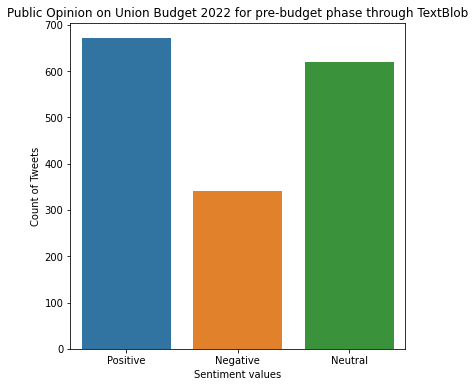

,Sentiment values,Count of Tweets
0,Positive,671
1,Negative,340
2,Neutral,620


In [ ]:
#taking tweets of before budget and storing into dataframe
data_csv = pd.read_csv("/content/drive/My Drive/IR_project/before_budget.csv")
data_df = pd.DataFrame()
data_df['Tweets'] = data_csv['Tweet Content'].copy()
#finding sentiment of tweets and showing them as bar graph
data_df_updated_textblob_x_test,data_df_updated_textblob_y_train,data_df_updated_textblob_count = find_sentiment_textBlob(data_df,"Public Opinion on Union Budget 2022 for pre-budget phase through TextBlob","prephase_sentiment_22_txtblb.jpg")
data_df_updated_textblob_y_train
data_df_updated_textblob_count
# data_df_updated_textblob_x_test

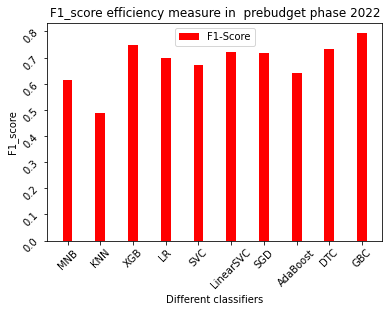

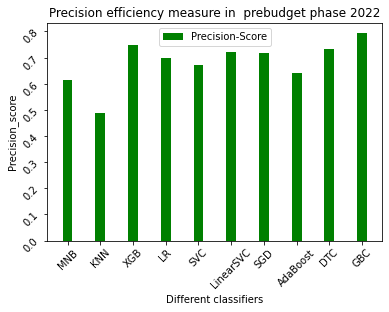

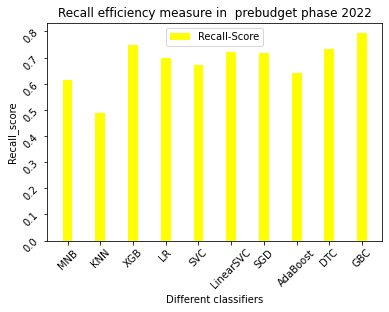

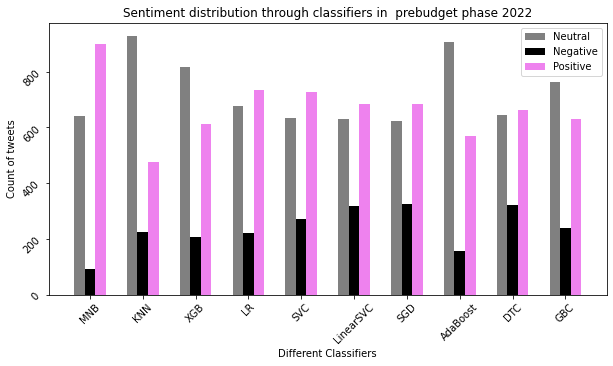

In [ ]:
data_df_updated_textblob_y_train = data_df_updated_textblob_y_train.replace(['Neutral', 'Negative', 'Positive'],['0','1','2'])
df = pd.read_csv("/content/drive/My Drive/IR_project/before_budget.csv")
x_sentiment_predict = df['Tweet Content']
x_sentiment_predict=mainprocess(x_sentiment_predict)
tfidf_vect_sentiment = TfidfVectorizer(min_df=3, max_df=0.9)
x_sentiment_predict = tfidf_vect_sentiment.fit_transform(x_sentiment_predict)
sentiment_study(x_sentiment_predict ,data_df_updated_textblob_y_train, " prebudget phase 2022" )

<h3> 1.2 Emotional Analysis</h3>

,Unnamed: 0,Username,Tweet Content,Retweet Count,Reply Count,Like Count,Clean Tweets
0,0,Muhammad5402,"@ABMPildat And accordingly to Income Tax laws,...",0,1,1,"and accordingli incom tax laws, case can open ..."
1,1,ANKITVE32044051,Things are not important \nIf It just expensiv...,1,0,2,thing are not import just expens accord your b...
2,2,backtoearth101,Inflation at peak! Petrol oil wheat flour pric...,0,0,0,inflat peak! petrol oil wheat flour price max!...
3,3,backtoearth101,GDP growing at 5 percent? Is this the only par...,1,2,9,gdp grow percent? thi the onli paramet think c...
4,4,bhaveshkumar44,Turkish President Recep Tayyip Erdogan has sac...,0,0,0,turkish presid recep tayyip erdogan ha sack th...


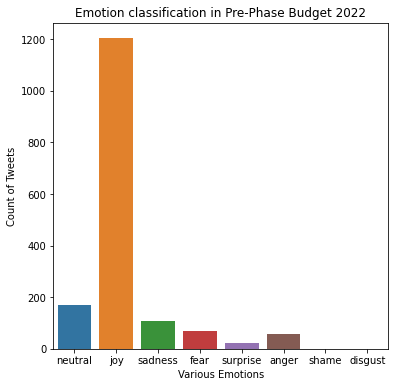

In [ ]:
pre_budget_data,pre_budget_cleantweets, y_predicted_before = process_data("/content/drive/My Drive/IR_project/before_budget.csv","random_model_prePhase.sav","Emotion classification in Pre-Phase Budget 2022","Emotion_Pre-Phase.jpg")
df = pd.DataFrame(pre_budget_cleantweets,columns =['Clean Tweets'])
col = df['Clean Tweets']            
pre_budget_data = pre_budget_data.join(col) #adding clean tweets dataframe to csv containing tweets and their information
pre_budget_data.drop(['User Location', 'User Verified','Tweet Id', 'Datetime'], axis='columns', inplace=True)
pre_budget_data.head()

<h3> 1.3 Word cloud and frequency distribution </h3> 

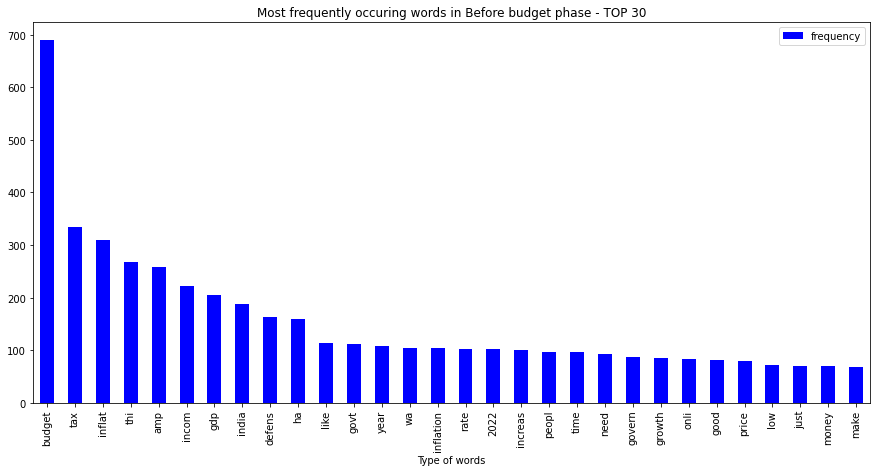

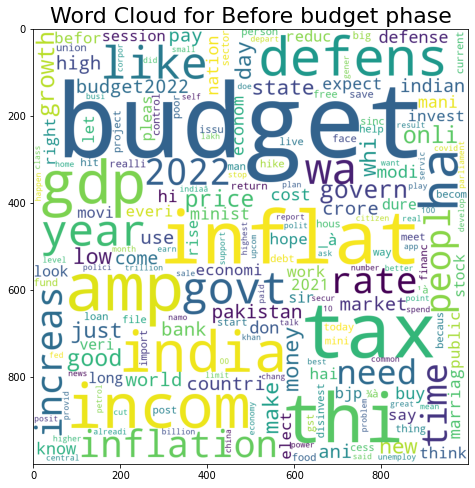

In [ ]:
#top 30 occuring words and word cloud 
make_wordcloud(pre_budget_cleantweets,"white","Most frequently occuring words in Before budget phase - TOP 30","Word Cloud for Before budget phase","pre-phase_wordcloud.jpg")

<h3>1.4 Calculate accuracies according to different model at different splits </h3>  

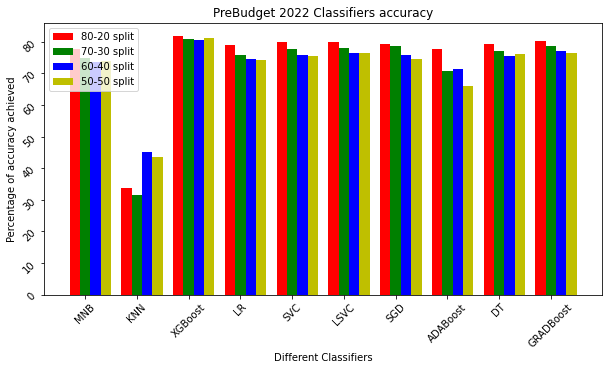

In [ ]:
#calling function compare accuracy to get accuracy of models for diffrent splits and plotting it
classification_report_count_dic_pre22,emotion_count_dic_pre22,split_80_lst1,split_70_lst1,split_60_lst1,split_50_lst1 = test_model_accuracy(pre_budget_cleantweets,y_predicted_before,"Emotions accuracy comparison between different classifiers for pre-budget phase 2022","emotion_accuracy_prephase_22.jpg","accuracy_prephase22.sav")
compare_accuracy(split_80_lst1,split_70_lst1,split_60_lst1,split_50_lst1,"PreBudget 2022")

<h3>1.5 Different emotion classification by different classifiers </h3>

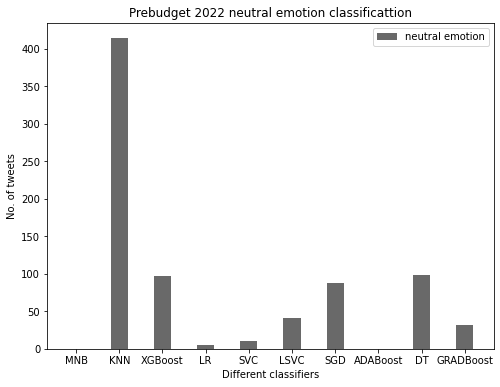

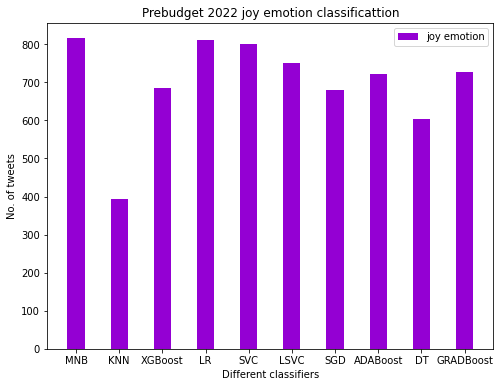

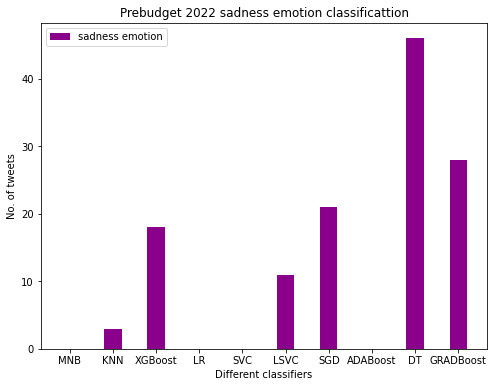

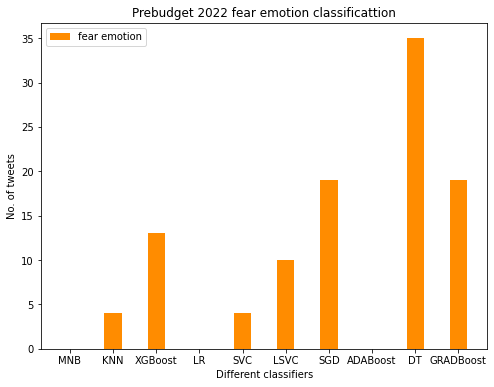

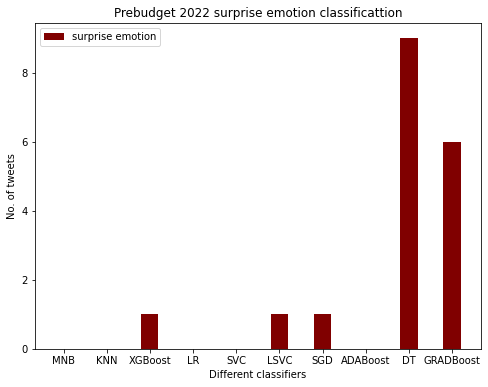

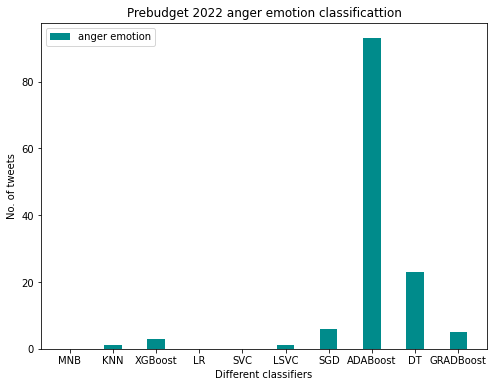

In [ ]:
compare_emotions(emotion_count_dic_pre22,"Prebudget 2022 ", " emotion classificattion")

<h4><u>Analysis from this phase</u> : Count of postive and neutral responses are very close to each other. XGBoost was found to be best classifier for this phase. Almost all classifiers classified joy as the most dominating emotion.</h4>

<h2> 2. Post-Budget Phase 2022-23 tweets</h2>

<h3>2.1 Sentiment Analysis</h3>

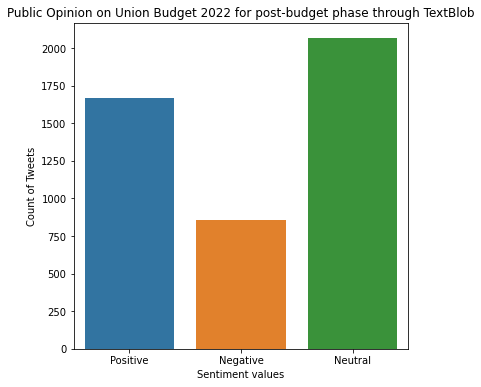

,Sentiment values,Count of Tweets
0,Positive,1669
1,Negative,857
2,Neutral,2066


In [ ]:
#taking before budget tweets and storing them into dataframe
data_csv1 = pd.read_csv("/content/drive/My Drive/IR_project/after_budget.csv", encoding = 'latin-1')
data_df1 = pd.DataFrame()
data_df1['Tweets'] = data_csv1['Tweet Content'].copy()
#finding sentiment of tweets and showing them as bar graph
data_df1_updated_textblob_x_test,data_df1_updated_textblob_y_train,data_df1_updated_textblob_count = find_sentiment_textBlob(data_df1,"Public Opinion on Union Budget 2022 for post-budget phase through TextBlob","postphase_sentiment_22_txtblb.jpg")
data_df1_updated_textblob_y_train
data_df1_updated_textblob_count

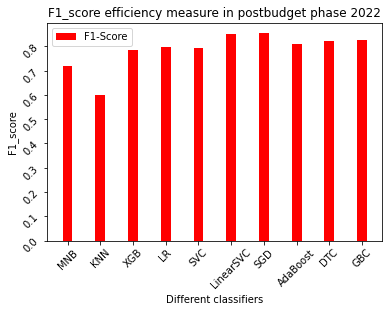

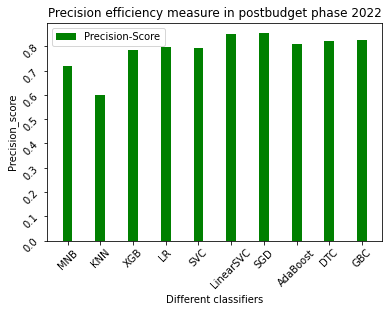

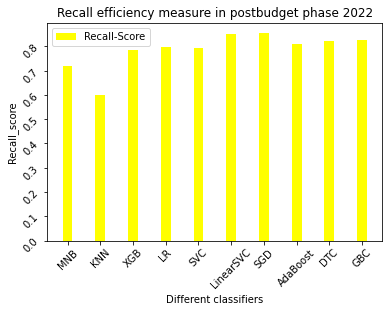

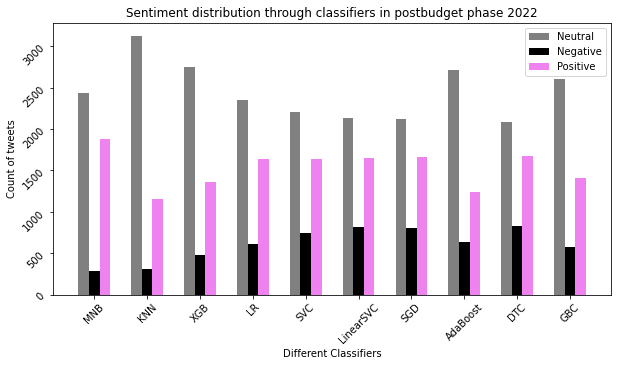

In [ ]:
data_df1_updated_textblob_y_train = data_df1_updated_textblob_y_train.replace(['Neutral', 'Negative', 'Positive'],['0','1','2'])
df = pd.read_csv("/content/drive/My Drive/IR_project/after_budget.csv", encoding = 'latin-1')
x_sentiment_predict = df['Tweet Content']
x_sentiment_predict=mainprocess(x_sentiment_predict)
tfidf_vect_sentiment = TfidfVectorizer(min_df=3, max_df=0.9)
x_sentiment_predict = tfidf_vect_sentiment.fit_transform(x_sentiment_predict)
sentiment_study(x_sentiment_predict ,data_df1_updated_textblob_y_train ,"postbudget phase 2022")

<h3>2.2 Emotional Analysis</h3>

,Unnamed: 0,Username,Tweet Content,Retweet Count,Reply Count,Like Count,Clean Tweets
0,0.0,Putera_Ns,Rolls Royce of defense. Simply awesome https:/...,0.0,1.0,1.0,roll royc defense. simpli awesom
1,1.0,pleasehesitate1,@AzizkhanISF ð¤¦ð¤¦ be like a defense minister.,0.0,1.0,0.0,ð¤¦ð¤¦ like defens minister.
2,2.0,fincase_in,You need someone who tells you that -\n'You do...,0.0,0.0,0.0,you need someon who tell you that 'you don't n...
3,3.0,colour135,The extent to which small countries are vulner...,0.0,0.0,0.0,the extent which small countri are vulner stro...
4,4.0,NasrinRasheda,Russian President #Putin orders his defense ch...,2.0,1.0,3.0,russian presid putin order hi defens chief put...


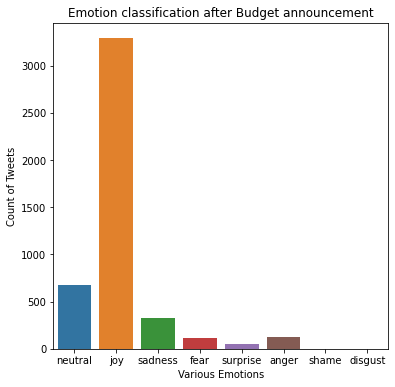

In [ ]:
#Creating dataframe containing clean tweets and tweets data
post_budget_data,post_budget_cleantweets, y_predicted_after = process_data("/content/drive/My Drive/IR_project/after_budget.csv","random_model_postPhase.sav","Emotion classification after Budget announcement","Emotion_Post-Phase.jpg")
df1 = pd.DataFrame(post_budget_cleantweets,columns =['Clean Tweets'])
e1 = df1['Clean Tweets']          
post_budget_data = post_budget_data.join(e1) #adding clean tweets column to csv containing tweets and their information
post_budget_data.drop(['User Location', 'User Verified','Tweet Id', 'Datetime'], axis='columns', inplace=True)
post_budget_data.head()

<h3> 2.3 Word cloud and frequency distribution </h3> 


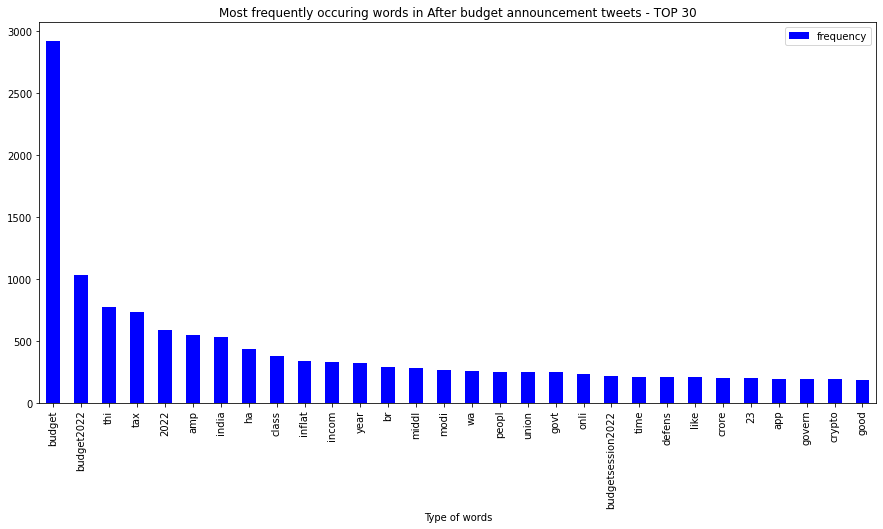

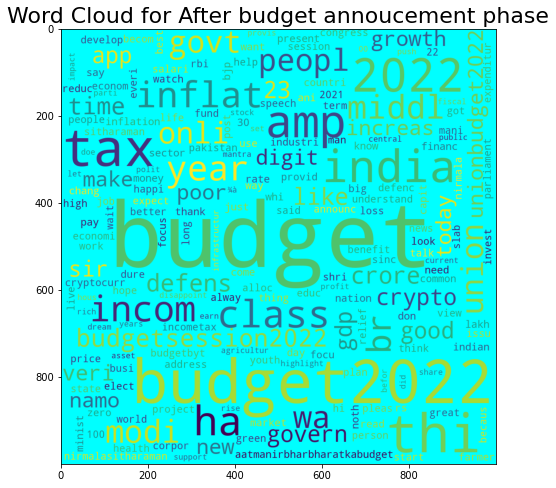

In [ ]:
#top 30 occuring words and word cloud
make_wordcloud(post_budget_cleantweets,"cyan","Most frequently occuring words in After budget announcement tweets - TOP 30","Word Cloud for After budget annoucement phase"," post-phase_wordcloud.jpg")

<h3>2.4 Calculate accuracies according to different model at different splits </h3>  

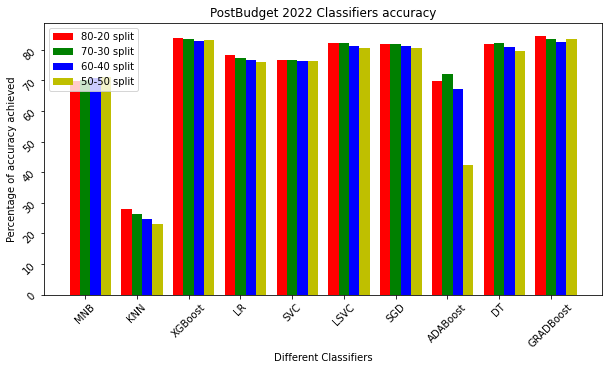

In [ ]:
#displaying graph for accuracy of models for diffrent splits
classification_report_count_dic_post22,emotion_count_dic_post22,split_80_lst2,split_70_lst2,split_60_lst2,split_50_lst2 = test_model_accuracy(post_budget_cleantweets,y_predicted_after,"Emotions accuracy comparison between different classifiers for post-budget phase 2022","emotion_accuracy_postphase_22.jpg","accuracy_postphase22.sav")
compare_accuracy(split_80_lst2,split_70_lst2,split_60_lst2,split_50_lst2,"PostBudget 2022")

<h3>2.5 Different emotion classification by different classifiers </h3>

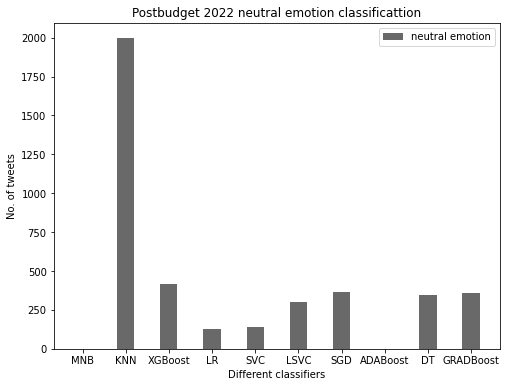

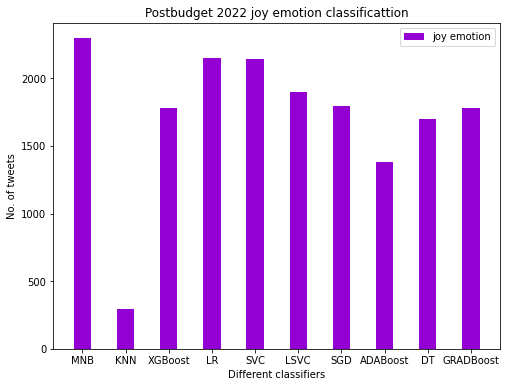

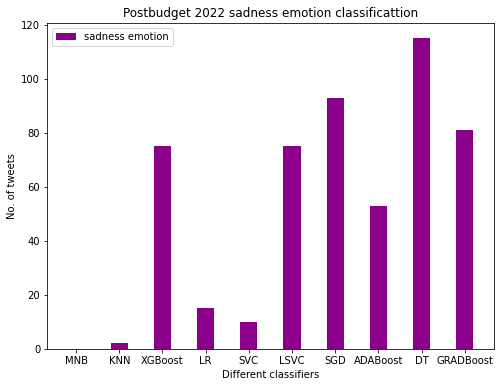

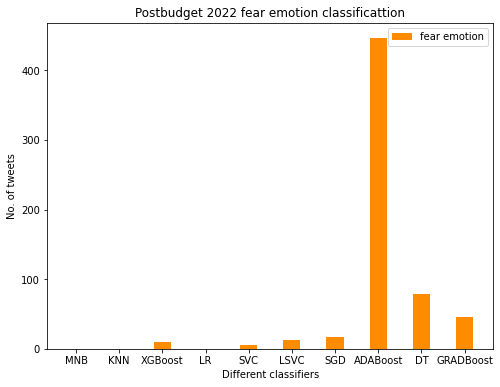

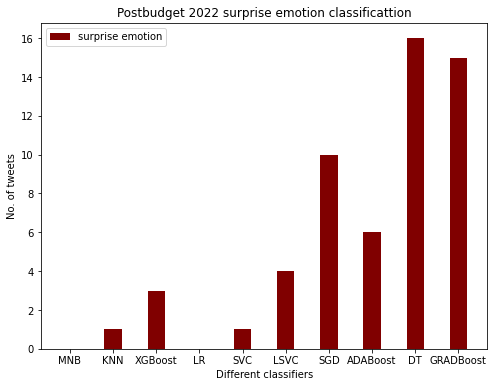

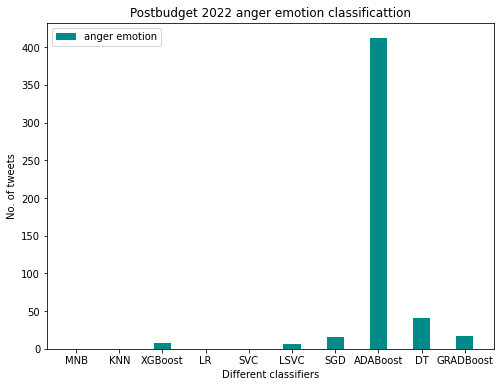

In [ ]:
compare_emotions(emotion_count_dic_post22,"Postbudget 2022 ", " emotion classificattion")

<h4><u>Analysis from this phase</u> : Count of neutral responses are dominating indicating people neither upset nor happy in this phase. XGBoost and GradientBoost are found best classifiers for this phase.</h4>

<h2> 3. Pre-Budget Phase 2021-22 Tweets </h2>

3.1 Sentiment Analysis


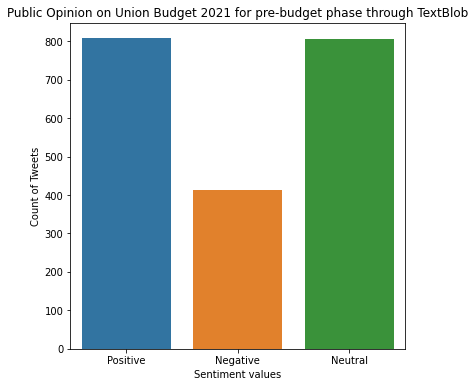

In [ ]:
#taking tweets of before budget and storing into dataframe
old_data_csv = pd.read_csv("/content/drive/My Drive/IR_project/old_before_budget.csv")
old_data_df = pd.DataFrame()
old_data_df['Tweets'] = old_data_csv['Tweet Content'].copy()
#finding sentiment of tweets and showing them as bar graph
old_data_df_updated_textblob_x_test,old_data_df_updated_textblob_y_train,old_data_df_updated_textblob_count = find_sentiment_textBlob(old_data_df,"Public Opinion on Union Budget 2021 for pre-budget phase through TextBlob","prephase_sentiment_21_txtblb.jpg")

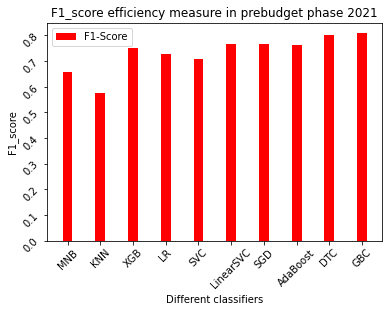

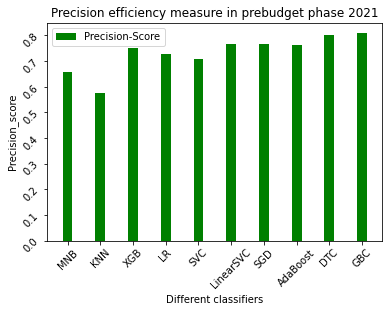

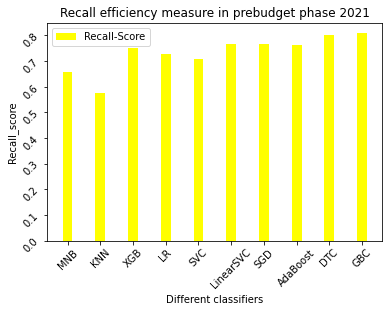

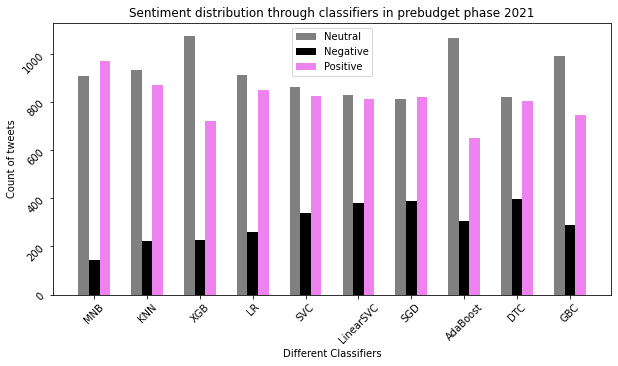

In [ ]:
old_data_df_updated_textblob_y_train = old_data_df_updated_textblob_y_train.replace(['Neutral', 'Negative', 'Positive'],['0','1','2'])
df = pd.read_csv("/content/drive/My Drive/IR_project/old_before_budget.csv", encoding = 'latin-1')
x_sentiment_predict = df['Tweet Content']
x_sentiment_predict=mainprocess(x_sentiment_predict)
tfidf_vect_sentiment = TfidfVectorizer(min_df=3, max_df=0.9)
x_sentiment_predict = tfidf_vect_sentiment.fit_transform(x_sentiment_predict)
sentiment_study(x_sentiment_predict ,old_data_df_updated_textblob_y_train, "prebudget phase 2021" )

3.2 Emotional Analysis

,Unnamed: 0,Username,Tweet Content,Retweet Count,Reply Count,Like Count,Clean Tweets
0,0,prince_man11,"Monday is budget, he wants tikait to keep on f...",0,0,2,"monday budget, want tikait keep fight &amp; cr..."
1,1,JavedFounder,"""Recession in India will end latest by March"" ...",0,0,1,"recess india will end latest march"" what shoul..."
2,2,VasudevSeth,@indiatvnews Please discuss budget as NO news ...,0,0,0,"pleas discuss budget news farmer ,peopl are fe..."
3,3,VasudevSeth,@aajtak Please discuss budget as NO news on Fa...,0,0,0,"pleas discuss budget news farmer ,peopl are fe..."
4,4,VasudevSeth,@aajtak Please discuss budget as NO news on Fa...,0,0,0,pleas discuss budget news farmer peopl are fed


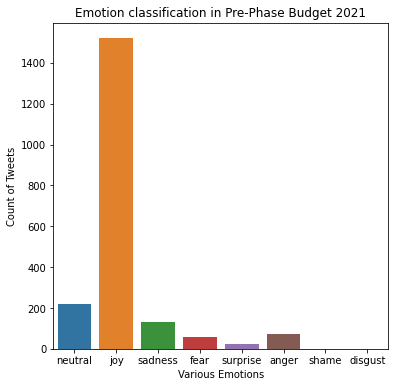

In [ ]:
old_pre_budget_data,old_pre_budget_cleantweets, old_y_predicted_before = process_data("/content/drive/My Drive/IR_project/old_before_budget.csv","random_model_prePhase_21.sav","Emotion classification in Pre-Phase Budget 2021","Emotion_Pre-Phase_21.jpg")
old_df = pd.DataFrame(old_pre_budget_cleantweets,columns =['Clean Tweets'])
old_col = old_df['Clean Tweets']            
old_pre_budget_data = old_pre_budget_data.join(old_col) #adding clean tweets dataframe to csv containing tweets and their information
old_pre_budget_data.drop(['User Location', 'User Verified','Tweet Id', 'Datetime'], axis='columns', inplace=True)
old_pre_budget_data.head()

3.3 Word distribution and word cloud

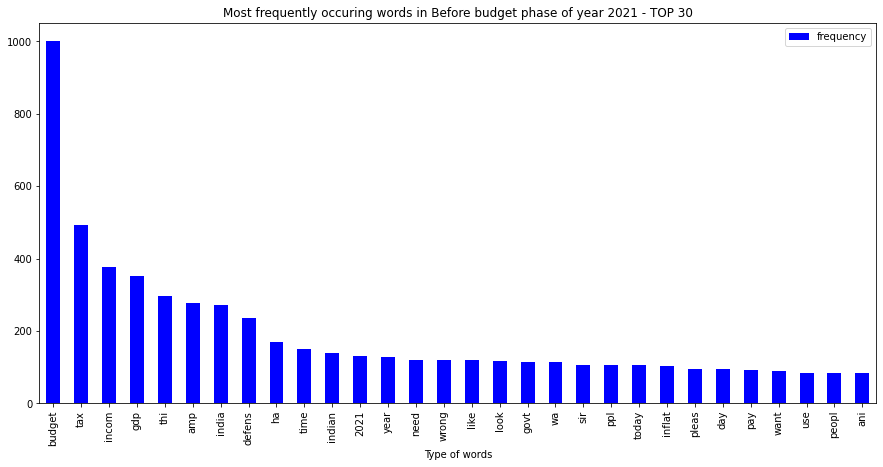

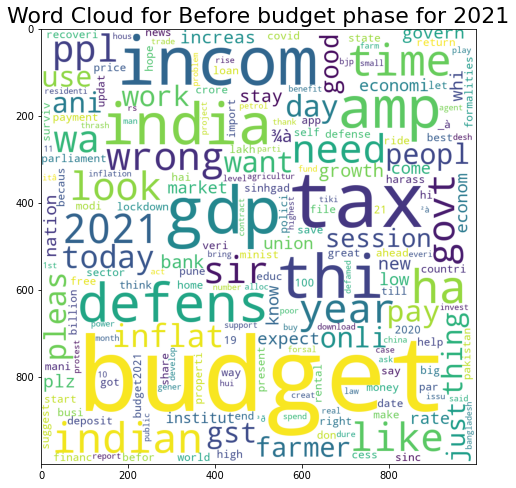

In [ ]:
#top 30 occuring words and word cloud 
make_wordcloud(old_pre_budget_cleantweets,"white","Most frequently occuring words in Before budget phase of year 2021 - TOP 30","Word Cloud for Before budget phase for 2021","pre-phase_wordcloud_21.jpg")

<h3>3.4 Calculate accuracies according to different model at different splits </h3> 

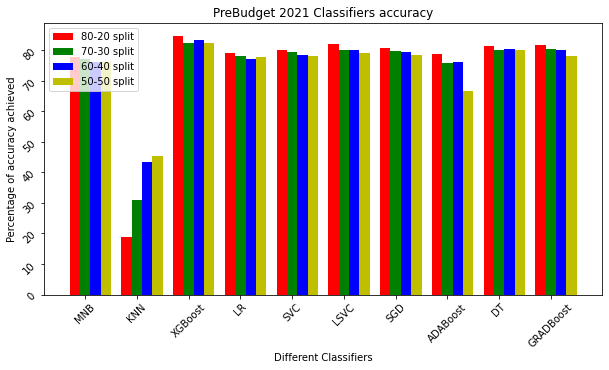

In [ ]:
classification_report_count_dic_pre21,emotion_count_dic_pre21,split_80_lst3,split_70_lst3,split_60_lst3,split_50_lst3 = test_model_accuracy(old_pre_budget_cleantweets,old_y_predicted_before,"Emotions accuracy comparison between different classifiers for pre-budget phase 2021","emotion_accuracy_prephase_21.jpg","accuracy_prephase21.sav")
compare_accuracy(split_80_lst3,split_70_lst3,split_60_lst3,split_50_lst3,"PreBudget 2021")

<h3> 3.5 Different emotion classification by different classifiers </h3>

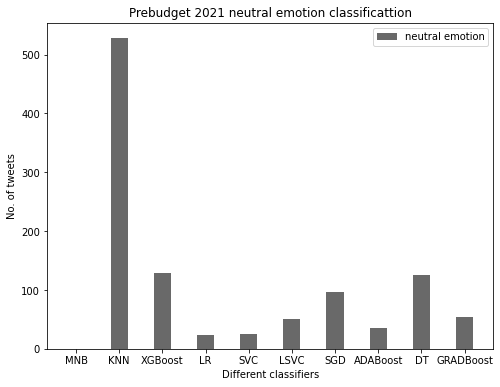

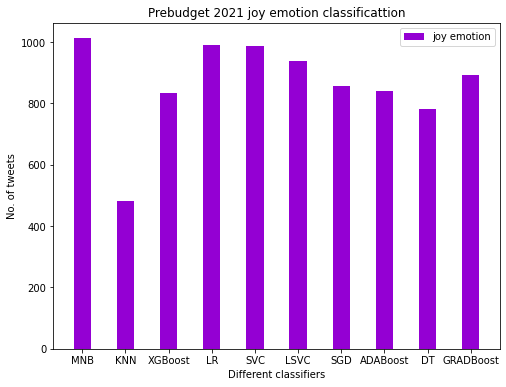

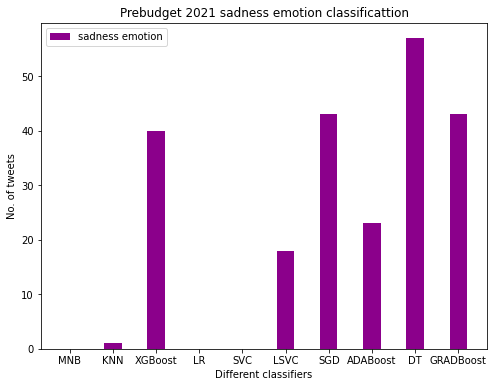

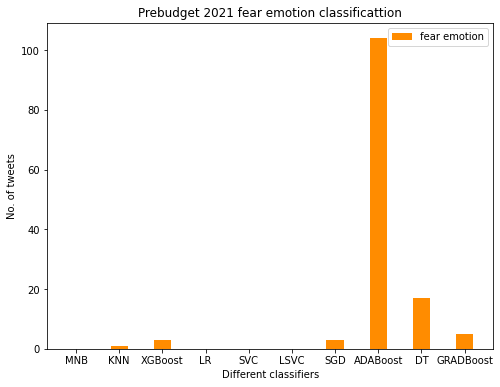

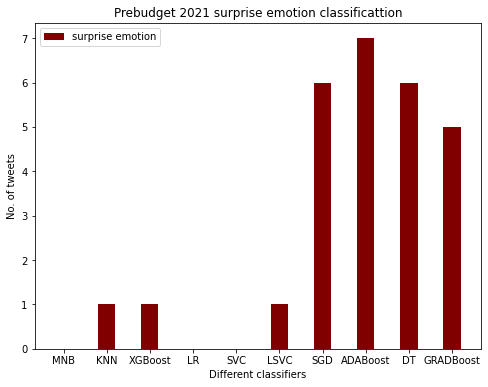

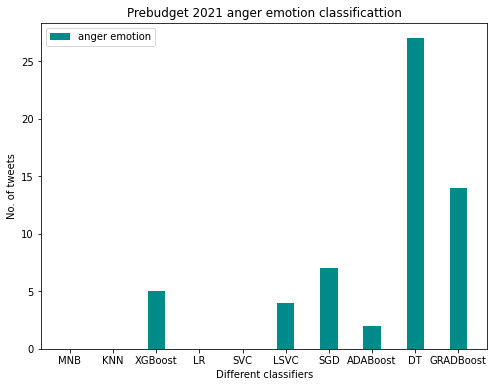

In [ ]:
compare_emotions(emotion_count_dic_pre21,"Prebudget 2021 ", " emotion classificattion")

<h4><u>Analysis from this phase</u> : Count of neutral and positive responses are equal in number in this phase indicating people are happy/excited for the coming budget. XGBoost and GradientBoost are found best classifiers for this phase. 'Joy' emotion is dominating over other emotions.</h4>

<h2> 4. Post-Budget 2021-22 Phase tweets </h2>

4.1 Sentiment Analysis

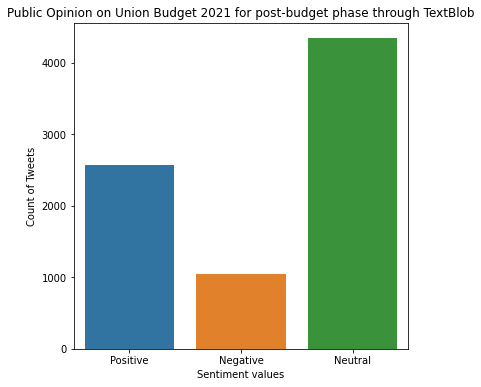

In [ ]:
#taking before budget tweets and storing them into dataframe
old_data_csv1 = pd.read_csv("/content/drive/My Drive/IR_project/old_after_budget.csv", encoding = 'latin-1')
old_data_df1 = pd.DataFrame()
old_data_df1['Tweets'] = old_data_csv1['Tweet Content'].copy()
#finding sentiment of tweets and showing them as bar graph
old_data_df1_updated_textblob_x_test,old_data_df1_updated_textblob_y_train,old_data_df1_updated_textblob_count = find_sentiment_textBlob(old_data_df1,"Public Opinion on Union Budget 2021 for post-budget phase through TextBlob","postphase_sentiment_21_txtblb.jpg")

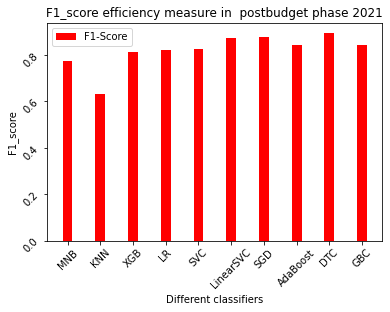

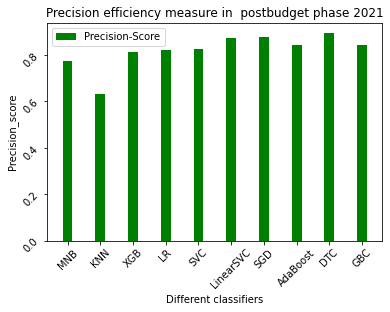

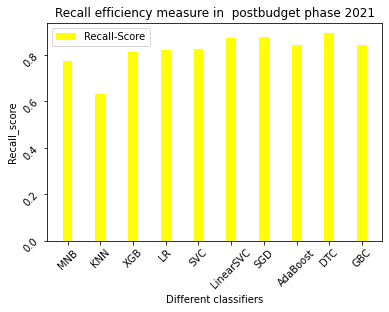

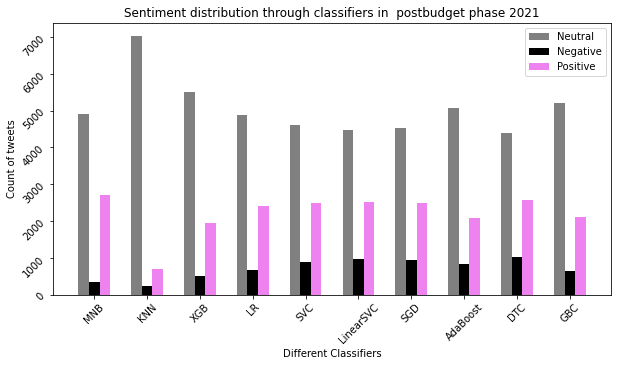

In [ ]:
old_data_df1_updated_textblob_y_train = old_data_df1_updated_textblob_y_train.replace(['Neutral', 'Negative', 'Positive'],['0','1','2'])
df = pd.read_csv("/content/drive/My Drive/IR_project/old_after_budget.csv", encoding = 'latin-1')
x_sentiment_predict = df['Tweet Content']
x_sentiment_predict=mainprocess(x_sentiment_predict)
tfidf_vect_sentiment = TfidfVectorizer(min_df=3, max_df=0.9)
x_sentiment_predict = tfidf_vect_sentiment.fit_transform(x_sentiment_predict)
sentiment_study(x_sentiment_predict ,old_data_df1_updated_textblob_y_train," postbudget phase 2021" )

4.2 Emotional Analysis

,Unnamed: 0,Username,Tweet Content,Retweet Count,Reply Count,Like Count,Clean Tweets
0,0.0,TirukuralKaram,@PierrePoilievre Even during North American ec...,0.0,1.0,0.0,"even dure north american econom boom times, th..."
1,1.0,TirukuralKaram,@PierrePoilievre How spend inflation rising bu...,1.0,0.0,1.0,how spend inflat rise but real sme supported?!...
2,2.0,FahadDurrani1,"GDP of worldâs largest economy, the US. That...",0.0,0.0,0.0,"gdp worldâ largest economy, the us. thatâ ..."
3,3.0,Mallik_Y1988,Sir @KTRTRS pls comment on this fee loot not o...,1.0,1.0,5.0,sir pl comment thi fee loot not nda gdp
4,4.0,BJPSunilChauhan,Indian economy has revived after the COVID sho...,0.0,0.0,0.0,indian economi ha reviv after the covid shock ...


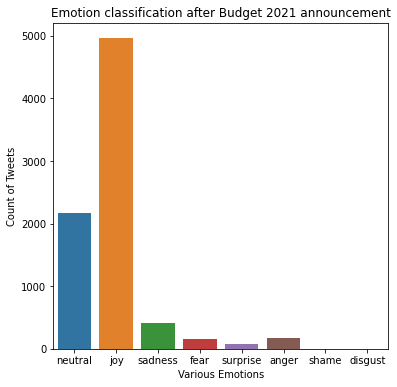

In [ ]:
#Creating dataframe containing clean tweets and tweets data
old_post_budget_data,old_post_budget_cleantweets, old_y_predicted_after = process_data("/content/drive/My Drive/IR_project/old_after_budget.csv","random_model_postPhase_21.sav","Emotion classification after Budget 2021 announcement","Emotion_Post-Phase_21.jpg")
old_df1 = pd.DataFrame(old_post_budget_cleantweets,columns =['Clean Tweets'])
old_e1 = old_df1['Clean Tweets']          
old_post_budget_data = old_post_budget_data.join(old_e1) #adding clean tweets column to csv containing tweets and their information
old_post_budget_data.drop(['User Location', 'User Verified','Tweet Id', 'Datetime'], axis='columns', inplace=True)
old_post_budget_data.head()

4.3 Word Cloud and Frequency distribution

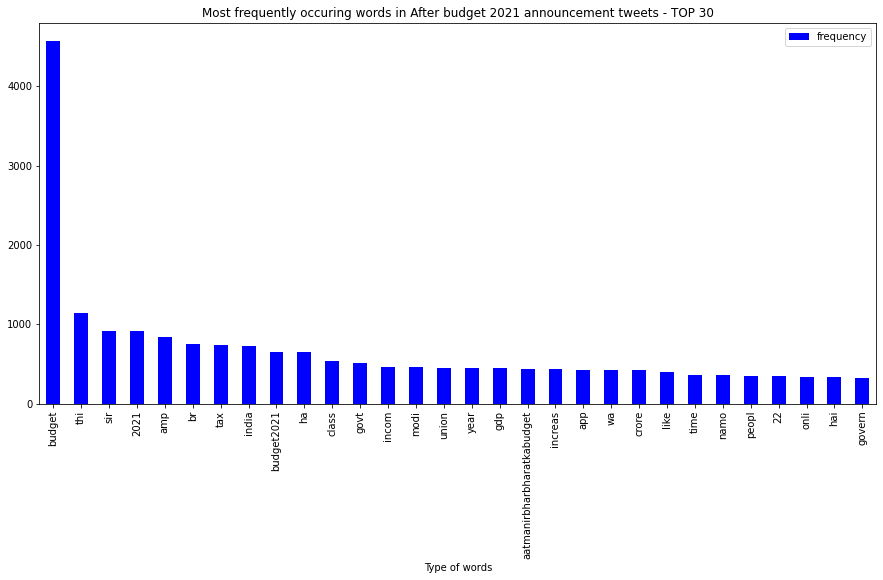

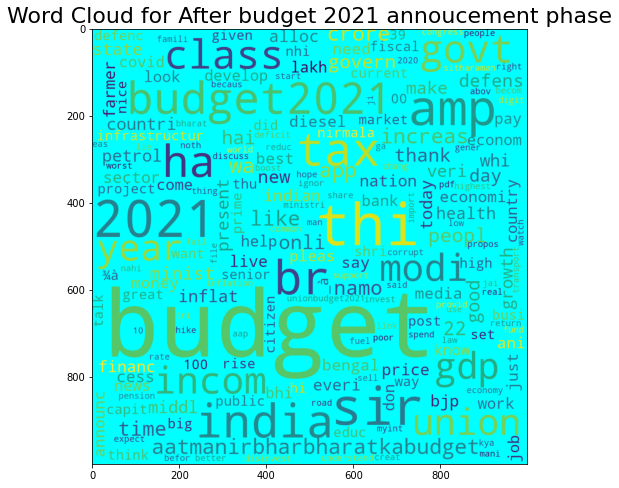

In [ ]:
#top 30 occuring words and word cloud
make_wordcloud(old_post_budget_cleantweets,"cyan","Most frequently occuring words in After budget 2021 announcement tweets - TOP 30","Word Cloud for After budget 2021 annoucement phase"," post-phase_wordcloud_21.jpg")

<h3>4.4 Calculate accuracies according to different model at different splits </h3>  

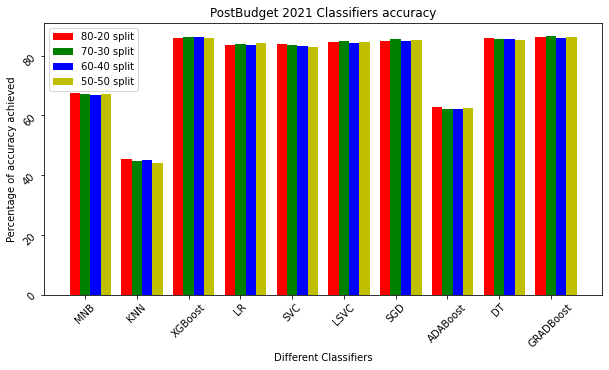

In [ ]:
classification_report_count_dic_post21,emotion_count_dic_post21,split_80_lst4,split_70_lst4,split_60_lst4,split_50_lst4 = test_model_accuracy(old_post_budget_cleantweets,old_y_predicted_after,"Emotions accuracy comparison between different classifiers for post-budget phase 2021","emotion_accuracy_postphase_21.jpg","accuracy_postphase21.sav")
compare_accuracy(split_80_lst4,split_70_lst4,split_60_lst4,split_50_lst4,"PostBudget 2021")

<h3> 4.5 Different emotion classification by different classifiers </h3>

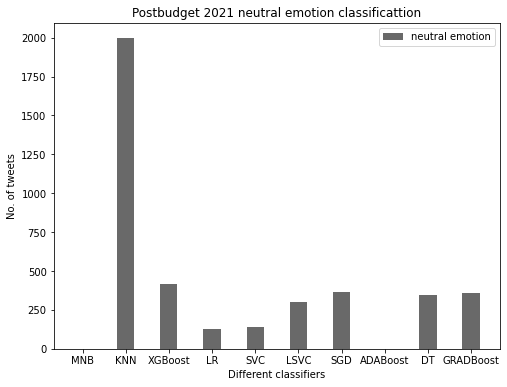

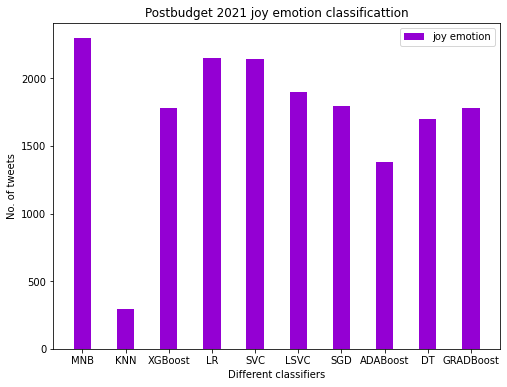

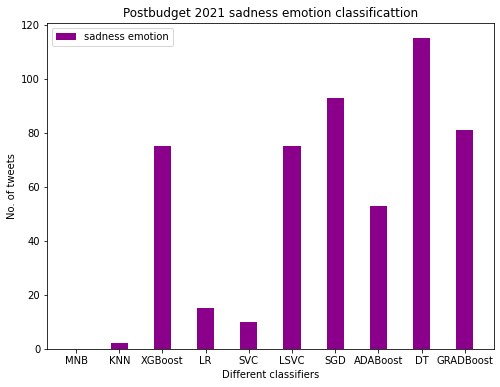

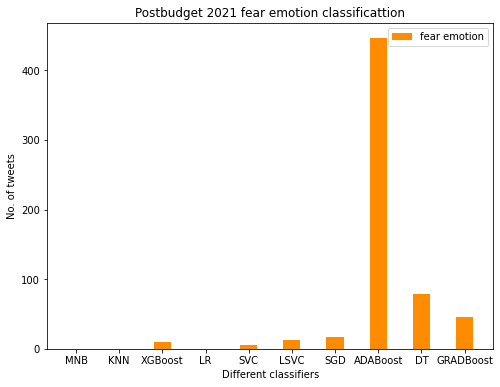

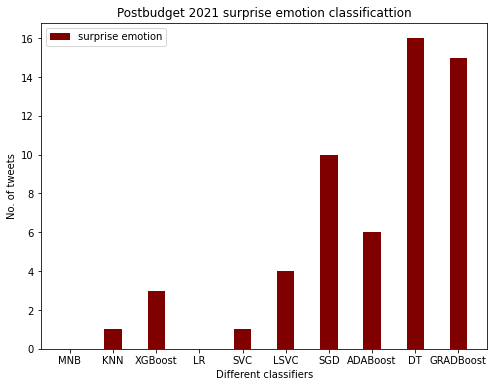

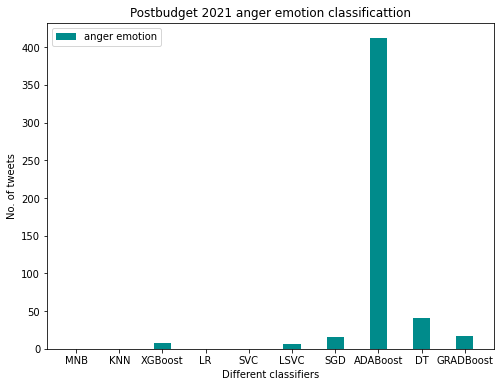

In [ ]:
compare_emotions(emotion_count_dic_post22,"Postbudget 2021 ", " emotion classificattion")

<h4><u>Analysis from this phase</u> : Count of neutral responses are dominating indicating people neither upset nor happy in this phase. XGBoost,DecisionTree and GradientBoost are found best classifiers for this phase. 'joy' emotion is dominating over other emotions.</h4>

<h2>Overall Final Analysis</h2>

<h3>In terms of Sentiments</h3>

In [ ]:
sentiment_phase_lst = ["PreBudget Phase 2022-23","PostBudget Phase 2022-23","PreBudget Phase 2021-22","PostBudget Phase 2021-22"]
postive_comm = []
negative_comm = []
neutral_comm = []

#analyzing sentiments for both financial years that are 2021-22 nd 2022-23
for i in range(3):
    if i== 0:
      postive_comm.append(data_df_updated_textblob_count['Count of Tweets'][i])
      postive_comm.append(data_df1_updated_textblob_count['Count of Tweets'][i])
      postive_comm.append(old_data_df_updated_textblob_count['Count of Tweets'][i])
      postive_comm.append(old_data_df1_updated_textblob_count['Count of Tweets'][i])
    elif i == 1:
      negative_comm.append(data_df_updated_textblob_count['Count of Tweets'][i])
      negative_comm.append(data_df1_updated_textblob_count['Count of Tweets'][i])
      negative_comm.append(old_data_df_updated_textblob_count['Count of Tweets'][i])
      negative_comm.append(old_data_df1_updated_textblob_count['Count of Tweets'][i])
    else:
      neutral_comm.append(data_df_updated_textblob_count['Count of Tweets'][i])
      neutral_comm.append(data_df1_updated_textblob_count['Count of Tweets'][i])
      neutral_comm.append(old_data_df_updated_textblob_count['Count of Tweets'][i])
      neutral_comm.append(old_data_df1_updated_textblob_count['Count of Tweets'][i])    


In [ ]:
#building dataframe for numerical analysis of data
sentiment_comparison_df = pd.DataFrame(list(zip(sentiment_phase_lst,postive_comm, neutral_comm,negative_comm)),columns =['Different Phases','No of postive comments/tweets', 'No of neutral comments/tweets','No of negative comments/tweets'])
sentiment_comparison_df

,Different Phases,No of postive comments/tweets,No of neutral comments/tweets,No of negative comments/tweets
0,PreBudget Phase 2022-23,671,620,340
1,PostBudget Phase 2022-23,1669,2066,857
2,PreBudget Phase 2021-22,808,805,412
3,PostBudget Phase 2021-22,2571,4345,1051


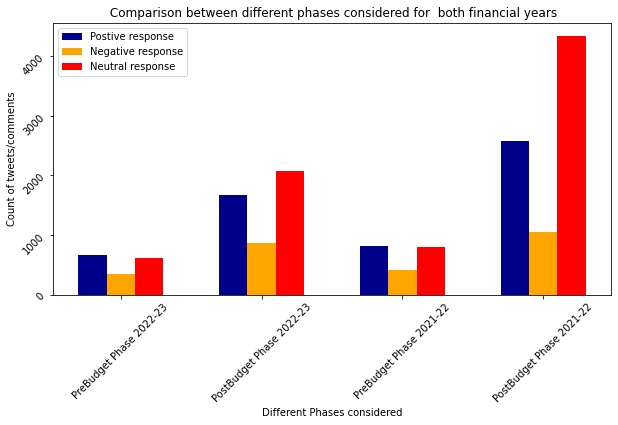

In [ ]:
#function for plotting graph of numerical data 
def final_compare_sentiment():
      N = 4
      ind = np.arange(N) 
      width = 0.20
      plt.figure(figsize=(10,5)) 
      xvals = postive_comm
      bar1 = plt.bar(ind, xvals, width, color = 'darkblue',align='center')
        
      yvals = negative_comm
      bar2 = plt.bar(ind+width, yvals, width, color='orange',align='center')

      zvals = neutral_comm
      bar3 = plt.bar(ind+(width*2), zvals, width, color='red',align='center')

        
      plt.xlabel("Different Phases considered")
      plt.ylabel('Count of tweets/comments')
      plt.title(" Comparison between different phases considered for  both financial years")   
      plt.xticks(ind+width,sentiment_phase_lst)
      plt.tick_params(rotation=45)
      plt.legend( (bar1, bar2,bar3), ('Postive response', 'Negative response','Neutral response'))
      plt.savefig('/content/drive/My Drive/IR2022_24_Project_DataFiles/final_comparsion_sentimentvalues.jpg',bbox_inches="tight",pad_inches=2)
      plt.show()

final_compare_sentiment()

In [ ]:
sentiment_temp_lst = ["Positive","Negative","Neutral"]


In [ ]:
sentiment_comparison1_df = pd.DataFrame(list(zip(sentiment_temp_lst,data_df_updated_textblob_count['Count of Tweets'], data_df1_updated_textblob_count['Count of Tweets'],old_data_df_updated_textblob_count['Count of Tweets'],old_data_df1_updated_textblob_count['Count of Tweets'])),columns =['Different Sentiments','Count of comments/tweets for PreBudget 2022-23', 'Count of comments/tweets for PostBudget 2022-23','Count of comments/tweets for PreBudget 2021-22','Count of comments/tweets for PostBudget 2021-22'])
sentiment_comparison1_df

,Different Sentiments,Count of comments/tweets for PreBudget 2022-23,Count of comments/tweets for PostBudget 2022-23,Count of comments/tweets for PreBudget 2021-22,Count of comments/tweets for PostBudget 2021-22
0,Positive,671,1669,808,2571
1,Negative,340,857,412,1051
2,Neutral,620,2066,805,4345


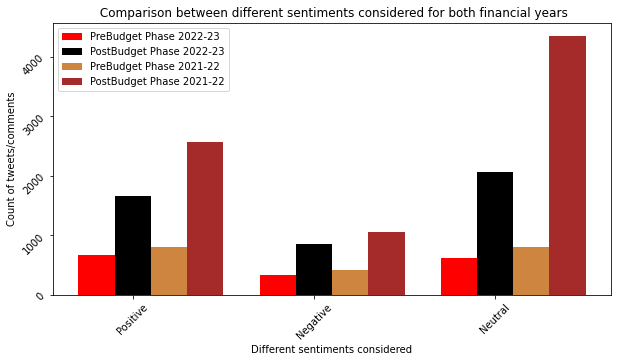

In [ ]:
#function for plotting graph to show positive, negative and neutral tweets for each year and phase
def final_compare_sentiment1():
      N = 3
      ind = np.arange(N) 
      width = 0.20
      plt.figure(figsize=(10,5)) 
      xvals = data_df_updated_textblob_count['Count of Tweets']
      bar1 = plt.bar(ind, xvals, width, color = 'red',align='center')
        
      yvals = data_df1_updated_textblob_count['Count of Tweets']
      bar2 = plt.bar(ind+width, yvals, width, color='black',align='center')

      zvals = old_data_df_updated_textblob_count['Count of Tweets']
      bar3 = plt.bar(ind+(width*2), zvals, width, color='peru',align='center')
      
      wvals = old_data_df1_updated_textblob_count['Count of Tweets']
      bar4 = plt.bar(ind+(width*3), wvals, width, color='brown',align='center')

        
      plt.xlabel("Different sentiments considered")
      plt.ylabel('Count of tweets/comments')
      plt.title(" Comparison between different sentiments considered for both financial years")   
      plt.xticks(ind+width,sentiment_temp_lst)
      plt.tick_params(rotation=45)
      plt.legend( (bar1, bar2,bar3,bar4), ('PreBudget Phase 2022-23','PostBudget Phase 2022-23','PreBudget Phase 2021-22','PostBudget Phase 2021-22'))
      plt.savefig("/content/drive/My Drive/IR2022_24_Project_DataFiles/final_comparsion_sentimentvalues1.jpg",bbox_inches="tight",pad_inches=2)
      plt.show()

final_compare_sentiment1()

<h3> In terms of Emotions </h3>

In [ ]:
#calculating average accuracy for each model for both year
accuracy_2021 = []
accuracy_2022 = []
for i in range(10):
     val = ((split_80_lst3[i]+split_70_lst3[i]+split_60_lst3[i]+split_50_lst3[i] + split_80_lst4[i] + split_70_lst4[i] + split_60_lst4[i] + split_50_lst4[i] )*100)/8
     accuracy_2021.append(val)
     val = ((split_80_lst2[i]+split_70_lst2[i]+split_60_lst2[i]+split_50_lst2[i] + split_80_lst1[i] + split_70_lst1[i] + split_60_lst1[i] + split_50_lst1[i] )*100)/8
     accuracy_2022.append(val)

In [ ]:
accuracy_comparison_df = pd.DataFrame(list(zip(model_lst,accuracy_2022, accuracy_2021)),columns =['Different Classifiers','Average % of accuracy achieved for 2022', 'Average % of accuracy achieved for 2021'])
accuracy_comparison_df

,Different Classifiers,Average % of accuracy achieved for 2022,Average % of accuracy achieved for 2021
0,MNB,72.730656,71.946288
1,KNN,31.962293,39.770844
2,XGBoost,82.318900,84.643285
3,LR,76.547908,80.948627
4,SVC,76.873487,81.148660
5,LSVC,79.743024,82.457978
6,SGD,79.273583,82.373468
7,ADABoost,67.190344,68.339026
8,DT,79.071567,82.994568
9,GRADBoost,80.827219,83.137014


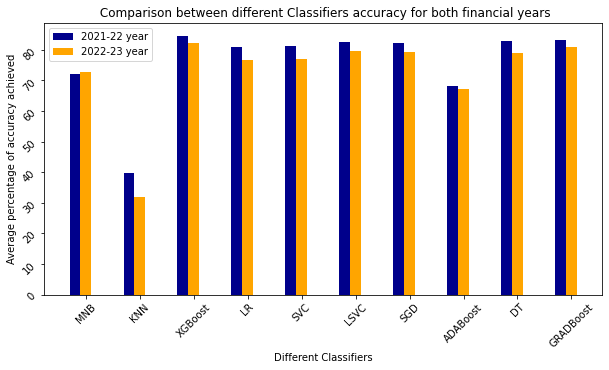

In [ ]:
#plotting above dataframe 
def final_compare_accuracy():
      N = 10
      ind = np.arange(N) 
      width = 0.20
      plt.figure(figsize=(10,5)) 
      xvals = accuracy_2021
      bar1 = plt.bar(ind, xvals, width, color = 'darkblue',align='center')
        
      yvals = accuracy_2022
      bar2 = plt.bar(ind+width, yvals, width, color='orange',align='center')
        
      plt.xlabel("Different Classifiers")
      plt.ylabel('Average percentage of accuracy achieved')
      plt.title(" Comparison between different Classifiers accuracy for both financial years")   
      plt.xticks(ind+width,model_lst)
      plt.tick_params(rotation=45)
      plt.legend( (bar1, bar2), ('2021-22 year', '2022-23 year'))
      plt.savefig("/content/drive/My Drive/IR2022_24_Project_DataFiles/final_comparsion_emotion_accuracy.jpg",bbox_inches="tight",pad_inches=2)
      plt.show()

final_compare_accuracy()      

<h4>Analysis : XGBoost classifier resulted best in terms of accuracy for both financial years with accuracy of 83.10% for 2022-23 and 84.57% for 2021-22.  </h4>

<h4>Emotion analysis through XGboost classifier</h4>

In [ ]:
#using XGboost(our best classifier) we get number of tweets for each emotion for both years
emotion_accuracy_2021 = []
emotion_accuracy_2022 = []
for i in range(8):
     val = (emotion_count_dic_pre21['XGBoost'][i]+emotion_count_dic_post21['XGBoost'][i])
     emotion_accuracy_2021.append(val)
     val = (emotion_count_dic_pre22['XGBoost'][i]+emotion_count_dic_post22['XGBoost'][i])
     emotion_accuracy_2022.append(val)

In [ ]:
emotion_comparison_df = pd.DataFrame(list(zip(list_emotions,emotion_accuracy_2022, emotion_accuracy_2021)),columns =['Different Emotions','Count of tweets achieved for 2022', 'Count of tweets achieved for 2021'])
emotion_comparison_df

,Different Emotions,Count of tweets achieved for 2022,Count of tweets achieved for 2021
0,neutral,515,1456
1,joy,2466,3323
2,sadness,93,145
3,fear,23,23
4,surprise,4,5
5,anger,11,45
6,shame,0,0
7,disgust,0,0


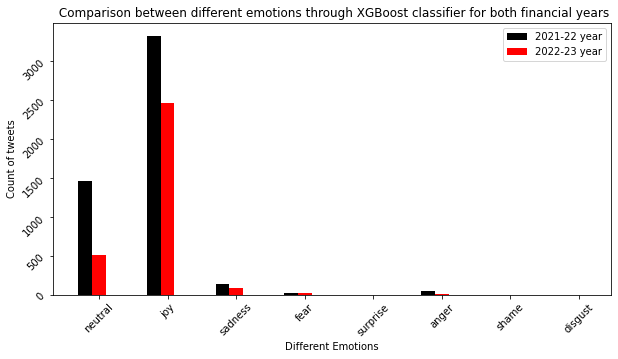

In [ ]:
#plotting the above dataframe
def final_compare_emotions():
      N = 8
      ind = np.arange(N) 
      width = 0.20
      plt.figure(figsize=(10,5)) 
      xvals = emotion_accuracy_2021
      bar1 = plt.bar(ind, xvals, width, color = 'black',align='center')
        
      yvals = emotion_accuracy_2022
      bar2 = plt.bar(ind+width, yvals, width, color='red',align='center')
        
      plt.xlabel("Different Emotions")
      plt.ylabel('Count of tweets')
      plt.title(" Comparison between different emotions through XGBoost classifier for both financial years")   
      plt.xticks(ind+width,list_emotions)
      plt.tick_params(rotation=45)
      plt.legend( (bar1, bar2), ('2021-22 year', '2022-23 year'))
      plt.savefig("/content/drive/My Drive/IR2022_24_Project_DataFiles/final_comparsion_emotion_XGBoost.jpg",bbox_inches="tight",pad_inches=2)
      plt.show()

final_compare_emotions()    

<h4>Since Count of tweets decreases in every emotion. It indicates that crowd is less inclined towards current financial year budget i.e. 2022-23 as compared to last year budget 2021-22 but still joy emotion was dominating in both financial year </h4>